In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('M45.csv', sep=';') # J/AN/325/740/csoca https://vizier.cds.unistra.fr/viz-bin/VizieR
raw

,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Bmag,Vmag,Seq,rad,Pkin,Pph,Psp
0,49.716259,25.833609,49.716123,25.833569,12.625,13.109,47,6.6326,0.0,0.0,0
1,49.718642,18.376395,49.718678,18.376467,12.195,11.296,47,8.8655,0.0,0.0,0
2,49.721583,23.792201,49.721593,23.792216,11.546,10.728,47,6.5171,0.0,0.0,0
3,49.724320,30.488802,49.724369,30.488820,12.137,11.815,47,8.8378,0.0,0.0,0
4,49.727530,23.965816,49.727548,23.965888,11.201,10.433,47,6.4965,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6526,63.942102,27.371086,63.942085,27.371113,11.588,9.804,47,7.0996,0.0,0.0,0
6527,63.947282,23.002351,63.947178,23.002415,11.620,10.663,47,6.6414,0.0,0.0,0
6528,63.948997,20.177255,63.948930,20.177322,11.706,11.118,47,7.7545,0.0,0.0,0
6529,63.950637,26.566916,63.950625,26.566910,11.741,11.558,47,6.8185,0.0,0.0,0


In [3]:
data = raw.copy().replace(['','       '], np.nan).dropna().astype(float)
data = data[data['Pkin'] > 0.5]
data = data[data['Pph'] > 0.5]
data = data.rename(columns={'Vmag': 'V', 'Bmag': 'B'})
data

,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,B,V,Seq,rad,Pkin,Pph,Psp
865,52.046132,27.307228,52.046080,27.307340,11.560,10.786,47.0,5.3166,0.8909,1.0000,1.0
1499,53.507531,24.880909,53.507474,24.881013,11.570,10.861,47.0,3.1131,0.6328,0.6111,1.0
1516,53.530459,24.344448,53.530404,24.344555,10.053,9.538,47.0,3.0191,0.7464,1.0000,1.0
1615,53.744432,23.530148,53.744378,23.530252,9.232,8.862,47.0,2.8944,0.5930,0.7555,1.0
1680,53.882059,22.823587,53.882002,22.823696,10.401,9.836,47.0,3.0147,0.6665,1.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4176,58.615967,21.389745,58.615918,21.389860,11.689,10.957,47.0,3.1943,0.7003,0.8572,1.0
4418,59.046364,22.221250,59.046308,22.221353,12.278,11.250,47.0,2.7920,0.6879,0.9766,1.0
4454,59.109161,23.784319,59.109105,23.784422,12.076,11.239,47.0,2.1079,0.6262,1.0000,1.0
4665,59.457258,18.562410,59.457202,18.562524,12.447,11.314,47.0,6.0881,0.5626,0.8148,1.0


In [4]:
R = 136.2 # pc
R0 = 10.0 # pc

data['B-V'] = data['B'] - data['V']
data['M_V'] = data['V'] - 5.0 * np.log10(R / R0)
data = data[['B-V', 'M_V']].copy()
data

,B-V,M_V
865,0.774,5.115114
1499,0.709,5.190114
1516,0.515,3.867114
1615,0.370,3.191114
1680,0.565,4.165114
...,...,...
4176,0.732,5.286114
4418,1.028,5.579114
4454,0.837,5.568114
4665,1.133,5.643114


In [5]:
data.to_csv('../../data/hr-M45.csv', index=False, float_format='%.4f')
!head ../../data/hr-M45.csv

B-V,M_V
0.7740,5.1151
0.7090,5.1901
0.5150,3.8671
0.3700,3.1911
0.5650,4.1651
0.5510,3.4801
0.6470,4.3731
0.0100,1.0251
0.6500,4.8491


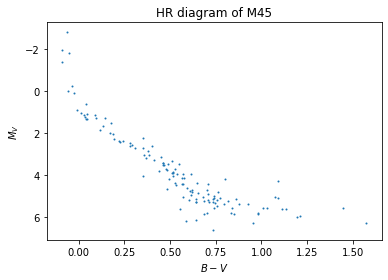

In [6]:
plt.scatter(data['B-V'], data['M_V'], s=1 )

plt.title('HR diagram of M45')
plt.xlabel('$B-V$')
plt.ylabel('$M_V$')

plt.gca().invert_yaxis()

plt.show()